# Question 1:

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from scipy.stats import multivariate_normal
import scipy.linalg as scln
from scipy.spatial import distance
import numpy.linalg as nplin
import statistics
from numpy.linalg import inv
from collections import defaultdict

In [9]:
def randomizedsampling(n,samplesize, prob):
    a = np.random.choice(n,samplesize,p = prob)
    count = np.zeros([1,n],dtype = int)
    for i in a:
        count[0,i] = count[0,i] + 1
    return(count)

In [10]:
def multivariate_Gaussian(mean, cov, sample):
    l = scln.cholesky(cov)
    z = np.random.normal(size=(sample, cov.shape[0]))
    return (z.dot(l)+mean)

In [11]:
def plotmisclassified(c12,c13,x1,colour,order,labels, marker):    
    m12 = []
    m13 = []
    Y1 = []
    
    for i in range(0,c12.shape[1]):
        if c12[0,i]<=0:
            m12.append(i)
        if c13[0,i]<=0:
            m13.append(i)
        if c12[0,i]>0 and c13[0,i]>0:
            Y1.append(i)
            
    XX1 = np.array([x1[:,i] for i in Y1])
    X12 = np.array([x1[:,i] for i in m12])
    X13 = np.array([x1[:,i] for i in m13])
    X123 = np.array([x1[:,i] for i in m13 if i in m12])
    overlap = X123.shape[0]
    
    
    if Y1:
        plt.scatter(XX1[:,0],XX1[:,1],color = colour[0],label = labels[0], marker = marker)
    if m12:
        plt.scatter(X12[:,0],X12[:,1],color = colour[1],label = labels[1], marker = marker)
    if m13:
        plt.scatter(X13[:,0],X13[:,1],color = colour[2],label = labels[2], marker = marker)
    if overlap:
        plt.scatter(X123[:,0],X123[:,1],color = colour[3],label = labels[3], marker = marker)
    
    res = [len(Y1),len(m12),len(m13)]
    return([res[order[0]-1],res[order[1]-1],res[order[2]-1],overlap,res[0]+res[1]+res[2]-overlap])

In [12]:
def confusionMatrix(dat):
    columnheads = ['Confusion Matrix','Real label 1','Real label 2','Real label 3']
    rowheads = [['Predicted label 1', 'Predicted label 2','Predicted label 3','Overlap of misclassified predicted classes','Total']]
    value = rowheads+dat
    fig = go.Figure(data=[go.Table( columnorder = [0,1,2,3],columnwidth = [70,50,50,50],
                               header=dict(values=columnheads,line_color='darkslategray',
                               fill_color='royalblue',align=['left','center','center','center'],
                               font=dict(color='white', size=16),height=40),
                               cells=dict(values=value, line_color='darkslategray',
                               fill=dict(color=['paleturquoise', 'white']),align=['left', 'center'],
                                    font_size=16,height=50))])
    fig.show()

In [14]:
def q1():
    mu1 = np.array([-1,0])
    mu2 = np.array([1,0])
    mu3 = np.array([0,1])
    
    cov1 = np.matrix([[1,-0.4],[-0.4,0.5]])
    cov2 = np.matrix([[0.5,0],[0,0.2]])
    cov3 = np.matrix([[0.1,0],[0,0.1]])
    
    prior = [.15,.35,.5]
    samplesize = 10000
    classsize = randomizedsampling(len(prior),samplesize,prior)
    print("class1 :",classsize[0][0])
    print("class2 :",classsize[0][1])
    print("class3 :",classsize[0][2])
    
    x1 = multivariate_Gaussian(mu1, cov1, classsize[0,0]).T
    x2 = multivariate_Gaussian(mu2, cov2, classsize[0,1]).T
    x3 = multivariate_Gaussian(mu3, cov3, classsize[0,2]).T
    
    plt.figure(1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(x1[0,:],x1[1,:], color = "red", label = "class 1",marker = "*")
    plt.scatter(x2[0,:],x2[1,:], color = "green", label = "class 2",marker = "+")
    plt.scatter(x3[0,:],x3[1,:], color = "blue", label = "class 3",marker = "^")
    plt.title("distribution of classes")
    plt.legend(loc = 2)
    plt.show()
    
    mu1 = mu1.reshape(2,1)
    mu2 = mu2.reshape(2,1)
    mu3 = mu3.reshape(2,1)
    covinv1 = cov1.I
    covinv2 = cov2.I
    covinv3 = cov3.I
    w1 = np.matmul(covinv1,mu1)
    W1 = -(1/2)*(covinv1)
    w01 = np.matmul(mu1.T,np.matmul(covinv1,mu1))*(-1/2)+np.log(prior[0])-(1/2)*np.log(nplin.det(cov1))
    gx11 = np.matmul(x1.T,np.matmul(W1,x1))+np.matmul(w1.T,x1)+w01
    gx12 = np.matmul(x2.T,np.matmul(W1,x2))+np.matmul(w1.T,x2)+w01
    gx13 = np.matmul(x3.T,np.matmul(W1,x3))+np.matmul(w1.T,x3)+w01
    
    w2 = np.matmul(covinv2,mu2)
    W2 = -(1/2)*(covinv2)
    w02 = np.matmul(mu1.T,np.matmul(covinv2,mu2))*(-1/2)+np.log(prior[1])-(1/2)*np.log(nplin.det(cov2))
    gx21 = np.diag(np.matmul(x1.T,np.matmul(W2,x1)))+np.matmul(w2.T,x1)+w02
    gx22 = np.diag(np.matmul(x2.T,np.matmul(W2,x2)))+np.matmul(w2.T,x2)+w02
    gx23 = np.diag(np.matmul(x3.T,np.matmul(W2,x3)))+np.matmul(w2.T,x3)+w02
    
    w3 = np.matmul(covinv3,mu3)
    W3 = -(1/2)*(covinv3)
    w03 = np.matmul(mu3.T,np.matmul(covinv3,mu3))*(-1/2)+np.log(prior[2])-(1/2)*np.log(nplin.det(cov3))
    gx31 = np.diag(np.matmul(x1.T,np.matmul(W3,x1)))+np.matmul(w3.T,x1)+w03
    gx32 = np.diag(np.matmul(x2.T,np.matmul(W3,x2)))+np.matmul(w3.T,x2)+w03
    gx33 = np.diag(np.matmul(x3.T,np.matmul(W3,x3)))+np.matmul(w3.T,x3)+w03
    
    c12 = gx11 - gx21
    c13 = gx11 - gx31
    
    c21 = gx22 - gx12
    c23 = gx22 - gx32
    
    c31 = gx33 - gx13
    c32 = gx33 - gx23
    marker = ["o","*","^"]
    plt.figure(num=2, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
    label1 = ["1 correctly classified","1 misclassified as 2","1 misclassified as 3","1 can be misclassifed as either 2 or 3"]
    label2 = ["2 correctly classified","2 misclassified as 1","2 misclassified as 3","2 can be misclassifed as either 1 or 3"]
    label3 = ["3 correctly classified","3 misclassified as 1","3 misclassified as 2","3 can be misclassifed as either 1 or 2"]
    length1 = plotmisclassified(c12,c13,x1,[(1,0,0),(.7,.2,.2),(.5,0,1),(0,.9,.5)],[1,2,3], label1, marker[0])
    length2 = plotmisclassified(c21,c23,x2,[(0,1,0),(1,.5,0),(0,.5,1),(.4,0,.8)],[2,1,3], label2, marker[1])
    length3 = plotmisclassified(c31,c32,x3,[(0,0,1),(.7,.1,.6),(0,1,.9),(.9,.2,0.3)],[2,3,1], label3, marker[2])
    plt.title("classification of all the classes")
    plt.legend(loc = 2)
    plt.show()
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    length1 = plotmisclassified(c12,c13,x1,[(1,0,0),(.5,1,0),(.5,0,1),(0,.2,.2)],[1,2,3], label1, marker[0])
    plt.legend(loc = 2)
    plt.title("classification of class 1")
    plt.show()
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    length2 = plotmisclassified(c21,c23,x2,[(0,1,0),(1,.5,0),(0,.5,1),(.2,0,.2)],[2,1,3], label2, marker[1])
    plt.legend(loc = 2)
    plt.title("classification of class 2")
    plt.show()
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    length3 = plotmisclassified(c31,c32,x3,[(0,0,1),(1,0,.5),(0,1,.5),(.2,.2,0)],[2,3,1], label3, marker[2])
    plt.legend(loc = 2)
    plt.title("classification of class 3")
    plt.show()
    confusiondata = [length1,length2,length3]
    confusionMatrix(confusiondata)
    poe = (10000-(length1[0]+length2[1]+length3[2]))/10000
    print("Probability of error: ", poe )


class1 : 1446
class2 : 3608
class3 : 4946


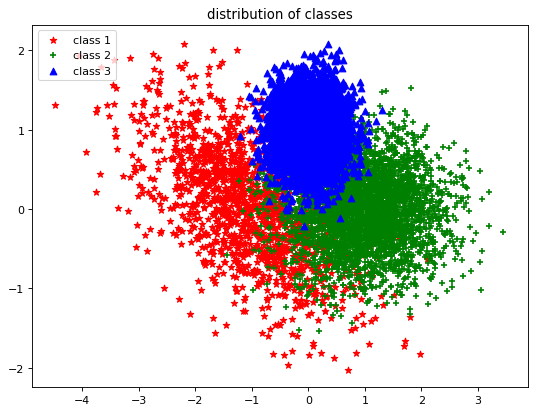

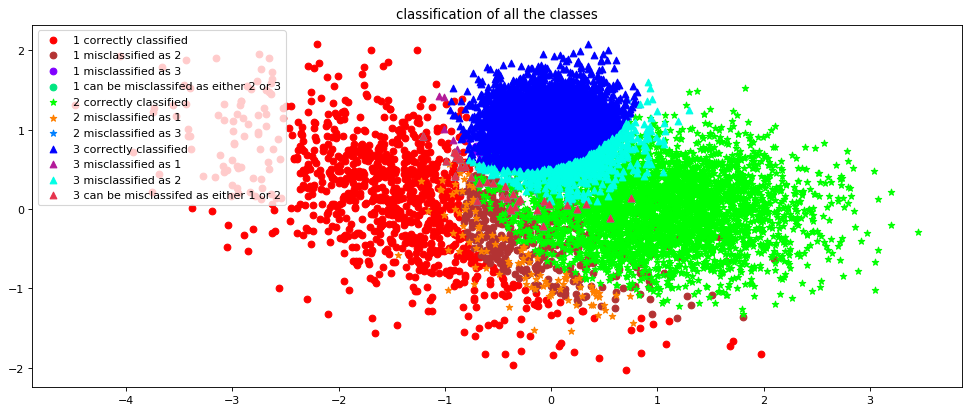

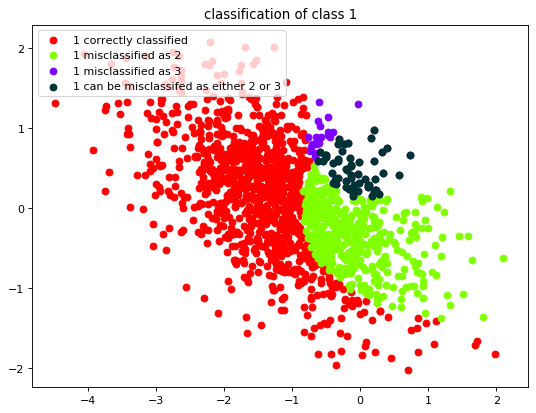

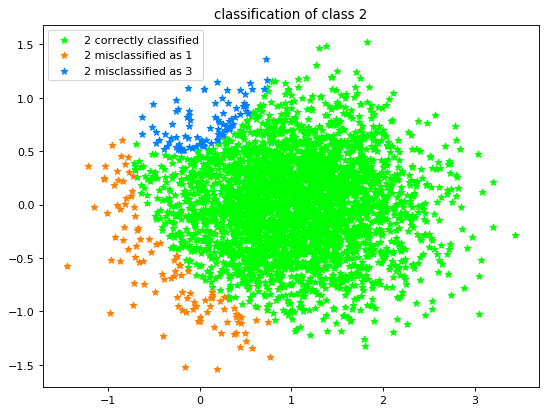

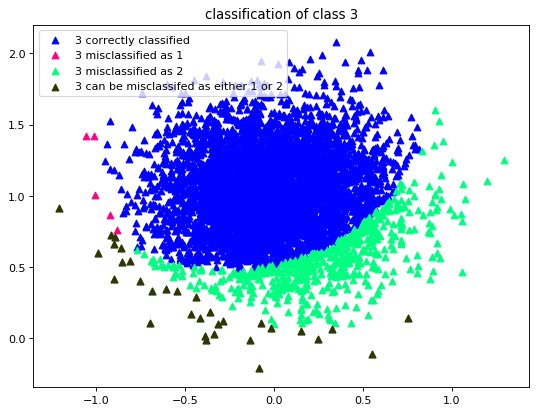

Probability of error:  0.1243


In [15]:
q1()

# The sampling is done in accordance with the cholesky theorem and is also goverened by the prior of the class. The classification is acheived using a gaussian discriminator. For each class we will get points classified correctly, and misclassified as the other two classes respectively and also  set of points which can be misclassified as any of the two point. This has been shown in the confusion matrix. The probability of error for this classifier is aproximatley ~0.1. Both colour and shape of the marker is used for visualisation purpose to show different classes.